In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [3]:
df.info()
# NaN değerimiz yok.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


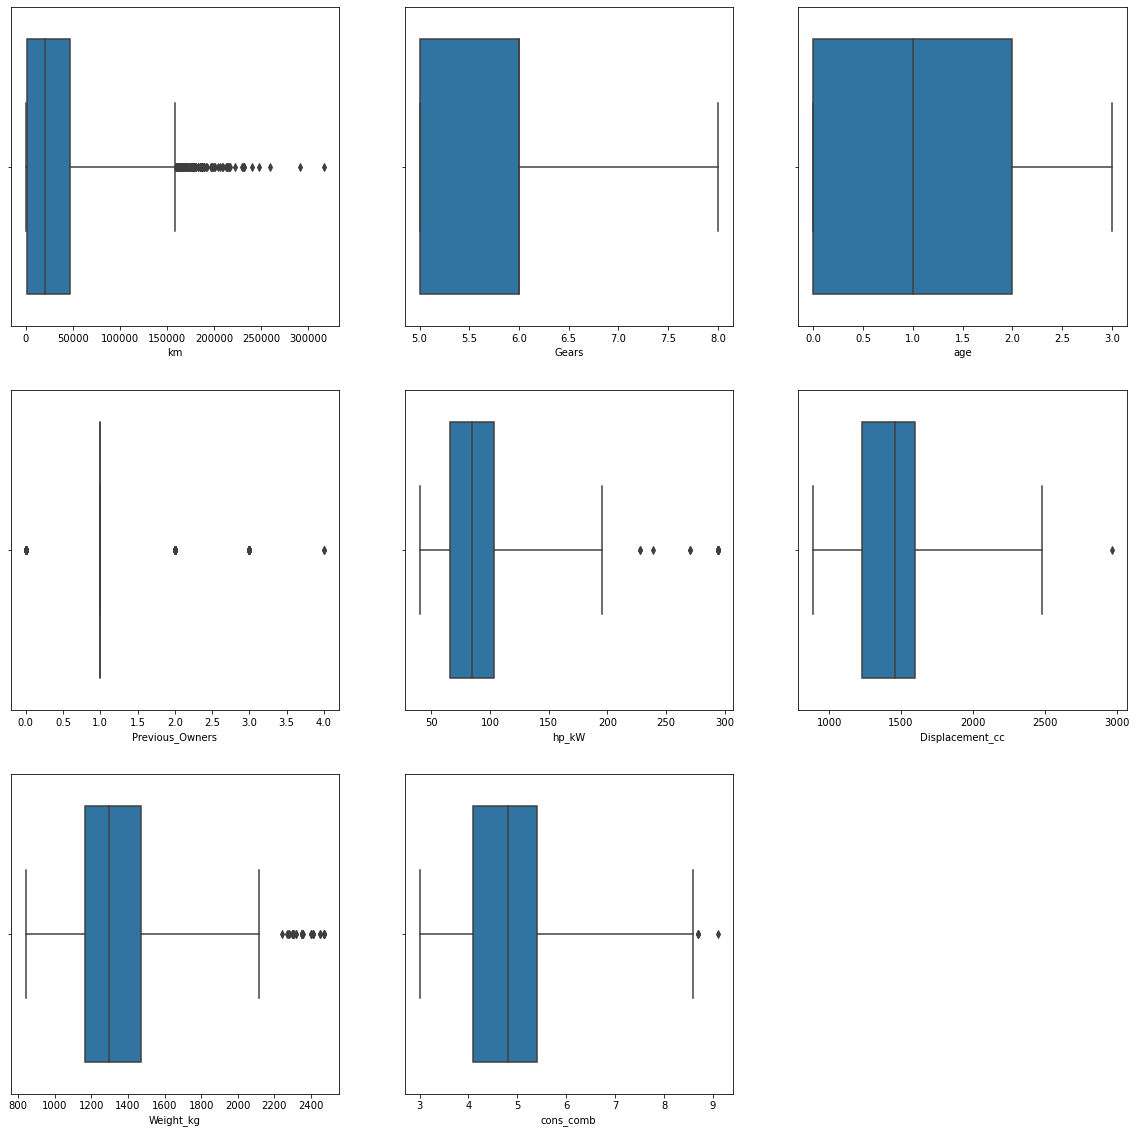

In [5]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes(float).columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(df.select_dtypes(float)[i], whis=2.5)
        

In [6]:
df2 = df.copy()
# sayısal veri haline getirmeden önce kopyaladık.

In [7]:
df.select_dtypes(object).columns
# object sutunlar.

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [8]:
for col in df.select_dtypes(object) : 
    print(f"{col:<20}", df[col].nunique())
    # object veri tipinde ki unique değerler.

make_model           9
body_type            8
vat                  2
Type                 5
Fuel                 4
Comfort_Convenience  6196
Entertainment_Media  346
Extras               659
Safety_Security      4442
Paint_Type           3
Upholstery_type      2
Gearing_Type         3
Drive_chain          3


In [9]:
df["make_model"].value_counts()
# marka sayılarımız.

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

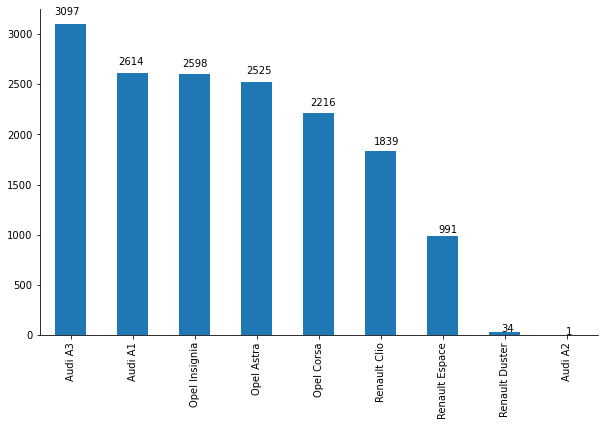

In [10]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [11]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [12]:
df.drop(index = 2614, inplace=True)

In [13]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb


In [14]:
from scipy.stats import stats

In [15]:
stats.skew(df["price"])
# normal dağılıma yakın. pozitif sağa çarpık.

1.236330745564795

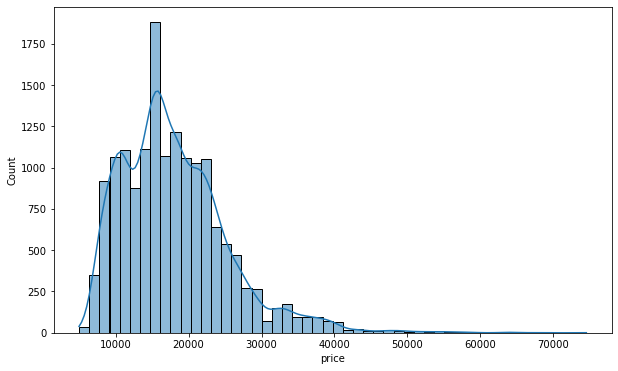

In [16]:
sns.histplot(df.price, bins = 50, kde = True);

In [17]:
multi = df.select_dtypes(float).corr()
multi[(multi != 1) & (multi >= 0.8)]
# multi_colinearty durumu yok. 

,km,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb
km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous_Owners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp_kW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Displacement_cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_comb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


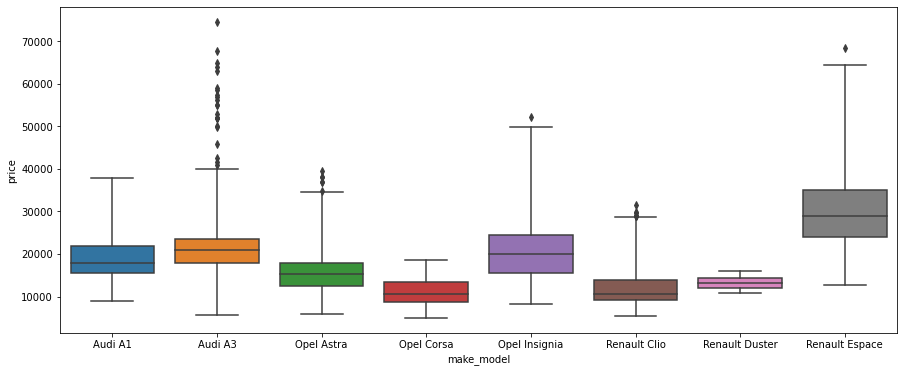

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "make_model", y = "price", data = df, whis = 3)
plt.show()
# markaya göre fiyatlara baktık ve Audi A3 ün diğer araçlardan epey pahalı olduğunu gördük.

### Get Dummies : 

In [19]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
# içinde virgül bulunan futureleri dummies haline getirdik ve join ettik.

In [20]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
# burdada dummies yaptıklarımızı siliyoruz.

In [21]:
# 2. dummies ile içinde virgül olamayan her satırda ayrı değerle ayrılımış olanları :
df = pd.get_dummies(df, drop_first =True)
# drop first ile fazla colon oluşturma dedik. 

In [22]:
df.shape

(15914, 133)

In [23]:
df.isnull().sum().any()

False

In [28]:
corr_by_price = df.corr()["price"].drop("price").sort_values()
corr_by_price
# tüm futurelerin target ile korelasyon oranlarına baktık.

age                         -0.473478
Gearing_Type_Manual         -0.431798
km                          -0.399301
make_model_Opel Corsa       -0.379363
Type_Used                   -0.366300
                               ...   
make_model_Renault Espace    0.420920
ss_LED Headlights            0.436273
Weight_kg                    0.468564
Gears                        0.530315
hp_kW                        0.696465
Name: price, Length: 132, dtype: float64

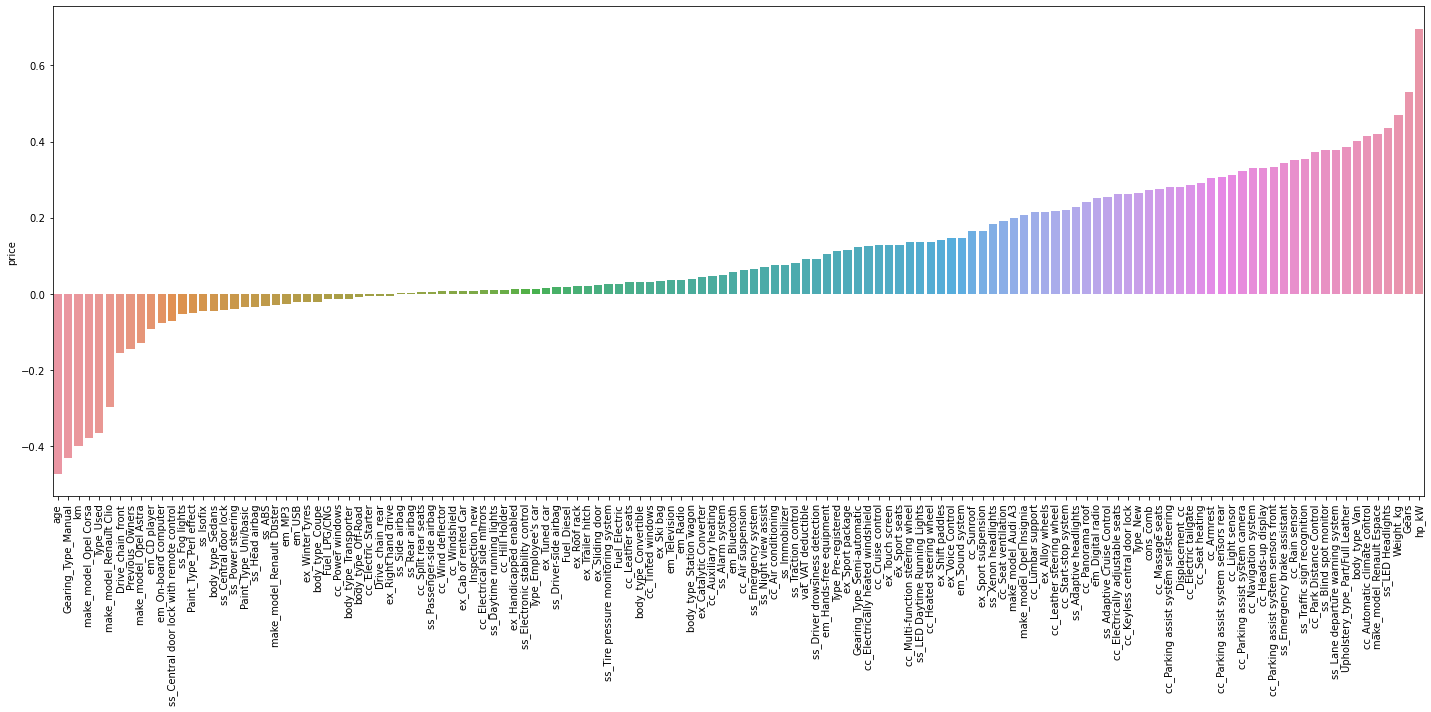

In [29]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();
# burda da grafik olarak baktık.

### Train test split : 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X= df.drop(columns="price")
y= df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### MinMax Sclae : 

In [32]:
from sklearn.preprocessing import MinMaxScaler
# get dummies futureleri var.

### Metrics : 

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Scale edilmeden skor alımı : 

In [36]:
pd.options.display.float_format = '{:.3f}'.format

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


### Scale edilmiş skor alımı : 

In [38]:
pd.options.display.float_format = '{:.3f}'.format

In [39]:
min_max_scaler = MinMaxScaler()

In [40]:
X_train_scaler = min_max_scaler.fit_transform(X_train)
X_test_scaler = min_max_scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)
train_val(model, X_train_scaler, y_train, X_test_scaler, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


### Get Dummy ile fazla future eklendiği için AdJust ile kontrol edelim : 

In [41]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # gözlem sayısı
    p = df.shape[1]-1 # bağımsız değişken sayısı 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [43]:
adj_r2(y_test, y_pred, df)
# test scale edilmemiş hali için yapılan kontrolde sıkıntı yok görüldü. yalancı bir artış olmadı dedi.

0.8895777429178955

In [44]:
model = LinearRegression()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)
train_val(model, X_train_scaler, y_train, X_test_scaler, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [45]:
adj_r2(y_test, y_pred, df)
# scale edilmiş haline baktık ve bize yukarıda ki değeri verdi. yani scale edilmiş halini rigdge ve lasso ile kontrol etmemiz
# gerekecek.

0.8895777429179157

### RidgeCV ile en iyi alpha değeri : 

In [46]:
from sklearn.linear_model import Ridge, RidgeCV

In [47]:
alpha_space = np.linspace(0,10,1000)

In [48]:
ridge_model = RidgeCV(alphas= alpha_space, cv=5)
ridge_model.fit(X_train_scaler, y_train)
y_pred = ridge_model.predict(X_test_scaler)
train_val(ridge_model, X_train_scaler, y_train, X_test_scaler, y_test)

,train,test
R2,0.890,0.890
mae,1703.856,1705.273
mse,6041175.900,5798049.125
rmse,2457.880,2407.914


In [49]:
ridge_model.alpha_
# en iyi alpha değeri ridge için.

0.9309309309309309

### LassoCV ile en iyi alpha değeri : 

In [50]:
from sklearn.linear_model import Lasso, LassoCV

In [52]:
lasso_model = LassoCV(alphas= alpha_space, cv=5)
lasso_model.fit(X_train_scaler, y_train)
y_pred = lasso_model.predict(X_test_scaler)
train_val(lasso_model, X_train_scaler, y_train, X_test_scaler, y_test)

,train,test
R2,0.890,0.890
mae,1706.497,1706.591
mse,6060227.698,5807955.082
rmse,2461.753,2409.970


In [53]:
lasso_model.alpha_

1.2312312312312312

### Tüm modelleri bir arada yapalım : 

In [55]:
lnr = LinearRegression()
lnr.fit(X_train_scaler, y_train)
lns = train_val(lnr, X_train_scaler, y_train, X_test_scaler, y_test)
lns

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [57]:
ridge_model = Ridge(alpha = 0.9309309309309309, max_iter=10000)
ridge_model.fit(X_train_scaler, y_train)
rs = train_val(ridge_model, X_train_scaler, y_train, X_test_scaler, y_test)
rs

,train,test
R2,0.890,0.890
mae,1703.856,1705.273
mse,6041175.900,5798049.125
rmse,2457.880,2407.914


In [58]:
lasso_model = Lasso(alpha = 1.2312312312312312, max_iter=10000)
lasso_model.fit(X_train_scaler, y_train)
ls = train_val(lasso_model, X_train_scaler, y_train, X_test_scaler, y_test)
ls

,train,test
R2,0.890,0.890
mae,1706.497,1706.591
mse,6060227.698,5807955.082
rmse,2461.753,2409.970


In [61]:
pd.concat([lns, rs, ls], axis=1)

,train,test,train,test,train,test
R2,0.890,0.890,0.890,0.890,0.890,0.890
mae,1705.452,1705.217,1703.856,1705.273,1706.497,1706.591
mse,6038122.231,5785150.711,6041175.900,5798049.125,6060227.698,5807955.082
rmse,2457.259,2405.234,2457.880,2407.914,2461.753,2409.970


### Grid_Search ile : 

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

grid_lasso_mdl = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)

In [64]:
grid_lasso_mdl.fit(X_train_scaler, y_train)
train_val(grid_lasso_mdl, X_train_scaler, y_train, X_test_scaler, y_test)

,train,test
R2,0.890,0.890
mae,1706.366,1706.483
mse,6057023.149,5805155.365
rmse,2461.102,2409.389


In [65]:
grid_lasso_mdl.best_params_

{'alpha': 1.1111111111111112}